# 4팀: 교보문고 연간 베스트 데이터 분석하기

In [7]:
# 파이썬 라이브러리
import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
# elem.send_keys(Keys.ENTER)
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
import time
from datetime import datetime

import pymysql # mysql 연결및 실행을 위한 모듈
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #차트 처리를 위한 모듈
%matplotlib inline
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from PIL import *
import seaborn as sns

In [5]:
# 교보문고 연간 베스트셀러 100권(2018-2022 5년간) url 스크래핑

user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'

years = [i for i in range(2018,2023)]
urls = []
for year in years: # 2018-2022 5년간 반복
    urls.append([])
    for i in range(1,11): # 한 페이지 당 20권, 5페이지 반복
        # 연간 베스트렐러 목록 페이지 불러오기
        url = 'https://product.kyobobook.co.kr/bestseller/total?period=004#?page=%d&per=20&period=004&ymw=%d&bsslBksClstCode=A'%(i,year)

        options = webdriver.ChromeOptions()
        options.add_argument(user_agent)
        options.add_argument('headless') # 페이지 안 열기
        options.add_argument('window-size=1920x1080')
        options.add_argument("disable-gpu")
        # 혹은 options.add_argument("--disable-gpu")
        driver = webdriver.Chrome(options=options)
        # driver.maximize_window()
        driver.implicitly_wait(2)
        driver.get(url)
        time.sleep(1)

        # 각 책의 url 뽑아 urls list에 저장
        elems = driver.find_elements_by_class_name('prod_link')
        for j in range(len(elems)):
            urls[-1].append(elems[j].get_attribute('href'))
#         print(year, i)

# year_urls 딕셔너리, 키는 연도, 값은 연간베스트도서 url 100개짜리 리스트
year_urls = dict(zip(years,urls))

In [6]:
# sql 연결 및 best_books_5years 테이블 생성
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='mywork', charset='utf8')
cursor = db.cursor()
sql = """
    CREATE TABLE IF NOT EXISTS best_books_5years_2(
        years SMALLINT NOT NULL,
        ranks SMALLINT NOT NULL,
        title VARCHAR(100),
        author VARCHAR(100),
        publisher VARCHAR(100),
        publishdate DATE,
        price INT,
        rate DOUBLE,
        likes VARCHAR(50),
        review_n INT,
        genre VARCHAR(50),
        page INT);"""
cursor.execute(sql)

# 테이블 채우기
for key, value in year_urls.items():
    # years <- key
    for i in range(len(value)):
        # ranks <- i+1
        
        headers = {'User-Agent':user_agent}
        response = requests.get(value[i], headers) # value[i]가 각 도서링크
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'lxml')
        
        title = soup.select_one('div.prod_title_area h1').text.replace(' ', '').replace('\n', '')
        # title <- title

        author = soup.select_one('div.author').text.replace(' ', '').replace('\n', '').split('저')
        # author <- author[0]

        publish_info = soup.select_one('div.prod_info_text.publish_date').text
        publish_info = publish_info.replace(' ', '').replace('\n', '').split('·')
        # publisher <- publish_info[0]
        datetime_format = "%Y년%m월%d일"
        publishdate = datetime.strptime(publish_info[1][:11], datetime_format).date()
        # publishdate <- publishdate

        price = soup.select_one('span.price span.val').text.replace('원', '').replace(',', '')
        # price <- price
        
        rating = soup.select_one('span.review_score.feel_lucky').text
        # rate <- rating

        like = soup.select_one('span.review_quotes_text').text
        # likes <- like

        cnt_review = soup.select_one('span.review_desc span.val').text
        # review_n <- cnt_review
        
        genere = soup.select('ol li.breadcrumb_item a')
        # genre <- genere[2].text
        
        page_link = soup.select('tr>td')
        page=page_link[2].text
        page_num = re.sub(r'[^0-9]', '', page)
        if page_num == '':
            page_num = page_num.replace('', '0')
        # page <- int(page_num)    
        
        sql = '''INSERT INTO best_books_5years_2 VALUES(
        {0}, {1}, "{2}", "{3}", "{4}", "{5}", {6}, {7}, "{8}", {9}, "{10}", {11});
        '''.format(key, i+1, title, author[0], publish_info[0], publishdate,
                   int(price), float(rating), like, int(cnt_review), genere[2].text, int(page_num))
        cursor.execute(sql)
        print(i,'-',j)
    print('----------------------------done-------------------------------')
        
db.commit()

0 - 15
1 - 15
2 - 15
3 - 15
4 - 15
5 - 15
6 - 15
7 - 15
8 - 15
9 - 15
10 - 15
11 - 15
12 - 15
13 - 15
14 - 15
15 - 15
16 - 15
17 - 15
18 - 15
19 - 15
20 - 15
21 - 15
22 - 15
23 - 15
24 - 15
25 - 15
26 - 15
27 - 15
28 - 15
29 - 15
30 - 15
31 - 15
32 - 15
33 - 15
34 - 15
35 - 15
36 - 15
37 - 15
38 - 15
39 - 15
40 - 15
41 - 15
42 - 15
43 - 15
44 - 15
45 - 15
46 - 15
47 - 15
48 - 15
49 - 15
50 - 15
51 - 15
52 - 15
53 - 15
54 - 15
55 - 15
56 - 15
57 - 15
58 - 15
59 - 15
60 - 15
61 - 15
62 - 15
63 - 15
64 - 15
65 - 15
66 - 15
67 - 15
68 - 15
69 - 15
70 - 15
71 - 15
72 - 15
73 - 15
74 - 15
75 - 15
76 - 15
77 - 15
78 - 15
79 - 15
80 - 15
81 - 15
82 - 15
83 - 15
84 - 15
85 - 15
86 - 15
87 - 15
88 - 15
89 - 15
90 - 15
91 - 15
92 - 15
93 - 15
94 - 15
95 - 15
96 - 15
97 - 15
98 - 15
99 - 15
100 - 15
101 - 15
102 - 15
103 - 15
104 - 15
105 - 15
106 - 15
107 - 15
108 - 15
109 - 15
110 - 15
111 - 15
112 - 15
113 - 15
114 - 15
115 - 15
116 - 15
117 - 15
118 - 15
119 - 15
120 - 15
121 - 15
122 - 15
123

192 - 15
193 - 15
194 - 15
195 - 15
----------------------------done-------------------------------


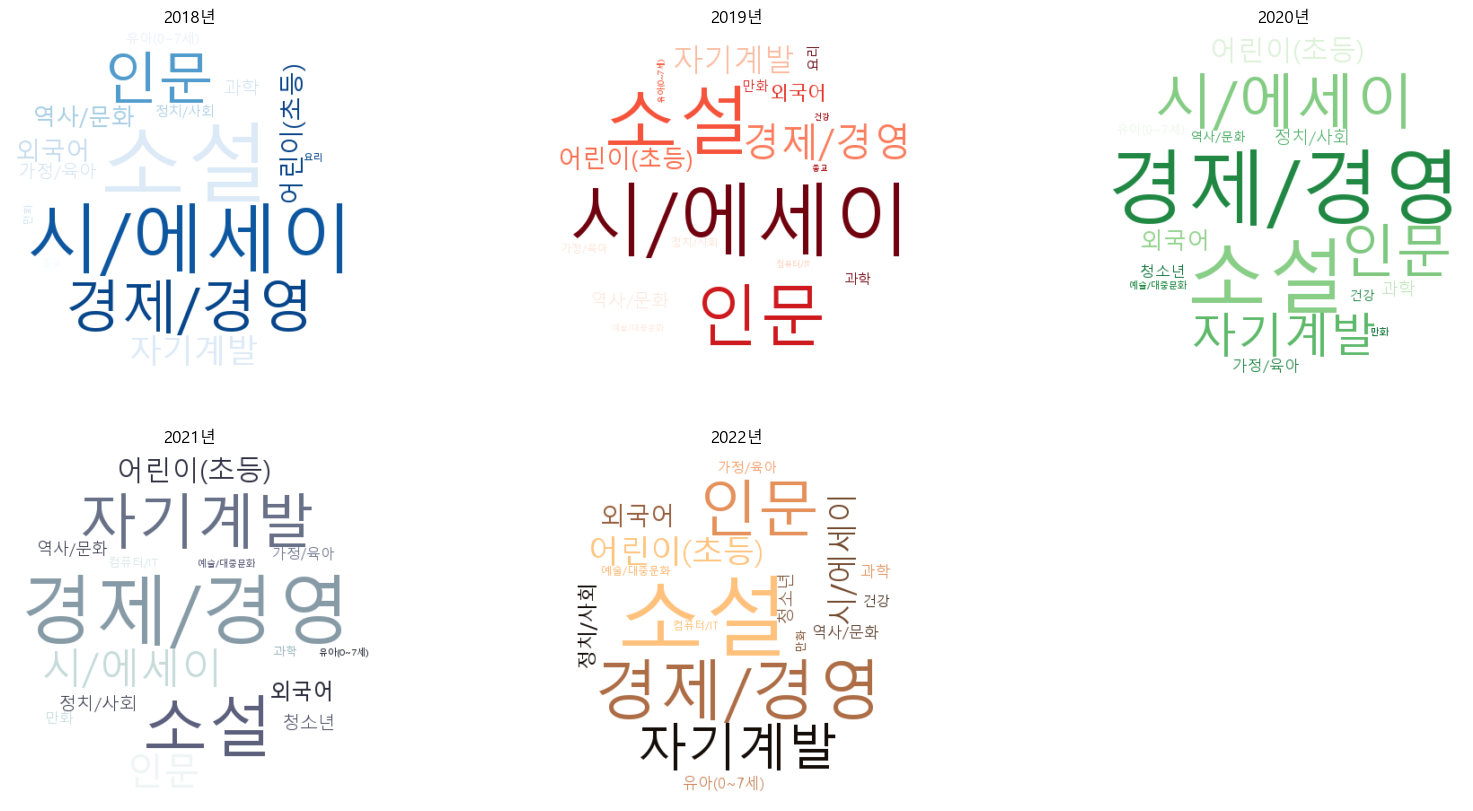

In [15]:
# 워드클라우드 연도별로 출력하기

# 한글 폰트 설정
# print([font.name for font in fm.fontManager.ttflist]) # 설치된 폰트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'

# 워드 클라우드 이미지
cand_mask=np.array(Image.open('circle.jpg')) 

# 2018년부터 2022년까지
plt.figure(figsize=(20,10))
years = [i for i in range(2018,2023)]
colors = ['Blues','Reds','Greens','bone','copper']
i = 1
for year in years:  
    SQL = """SELECT genre, count(*)
    FROM best_books_5years_2
    WHERE years = {}
    GROUP BY genre;""".format(year) #  SQL 구문 만들기
    cursor.execute(SQL)
    res = cursor.fetchall()
    dict_res = dict((x,y)for x,y in res) # tuple -> dictionary
    
    # wrodcloud 생성
    wordcloud = WordCloud(font_path='malgun.ttf', background_color='white', 
                          colormap=colors[i-1], mask=cand_mask,).generate_from_frequencies(dict_res)
    plt.subplot(2,3,i)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title('{}년'.format(year))
    plt.axis('off')
    i+=1
plt.show()

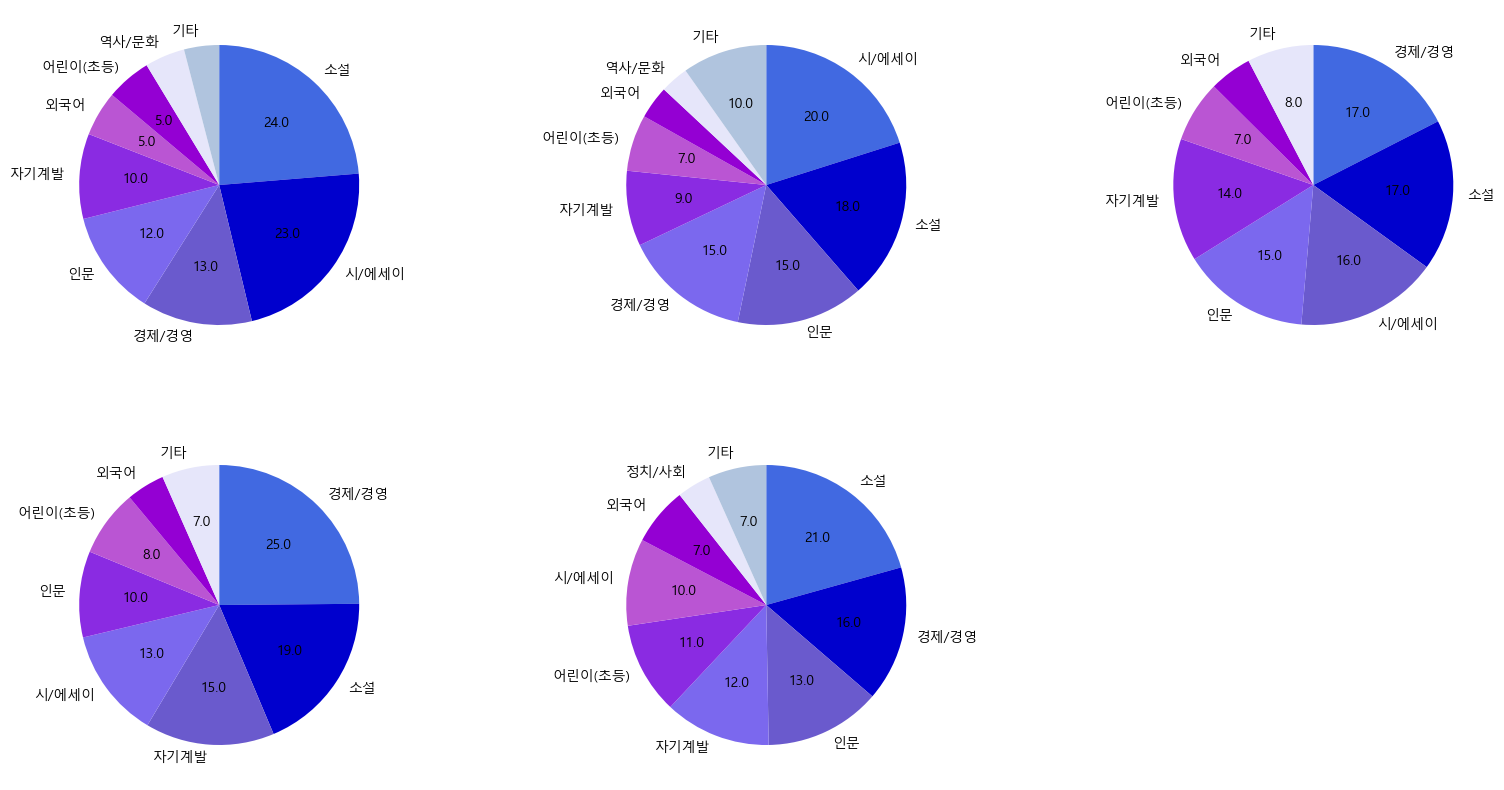

In [21]:
# 원그래프 연도별로 출력하기

plt.figure(figsize=(20,10))
colors = ['royalblue','mediumblue','slateblue','mediumslateblue',
          'blueviolet','mediumorchid','darkviolet','lavender','lightsteelblue']
# 2018년부터 2022년까지
years = [i for i in range(2018,2023)]
i = 1
for year in years:
    SQL = """with sub as (
    SELECT genre, count(*) c FROM best_books_5years_2
    WHERE years = {} GROUP BY genre
    ORDER BY 2 DESC)
    select * from  sub a where a.c > 5
    union
    select concat('기타') genre, sum(b.c) c from sub b where b.c <= 3;""".format(year)
    cursor.execute(SQL)
    res = cursor.fetchall()
    dict_res = dict((x,y)for x,y in res) # # tuple -> dictionary
    
    ratio = []
    labels = []
    for key, value in dict_res.items():
        labels.append(key)
        ratio.append(value)
    plt.subplot(2,3,i)
    i+=1
    plt.pie(ratio, labels=labels, startangle=90, counterclock=False, autopct=(lambda x: str(round(x,0)) if x > 5 else ' '), colors=colors)
    
# 책이 3권 이하는 기타
plt.show()

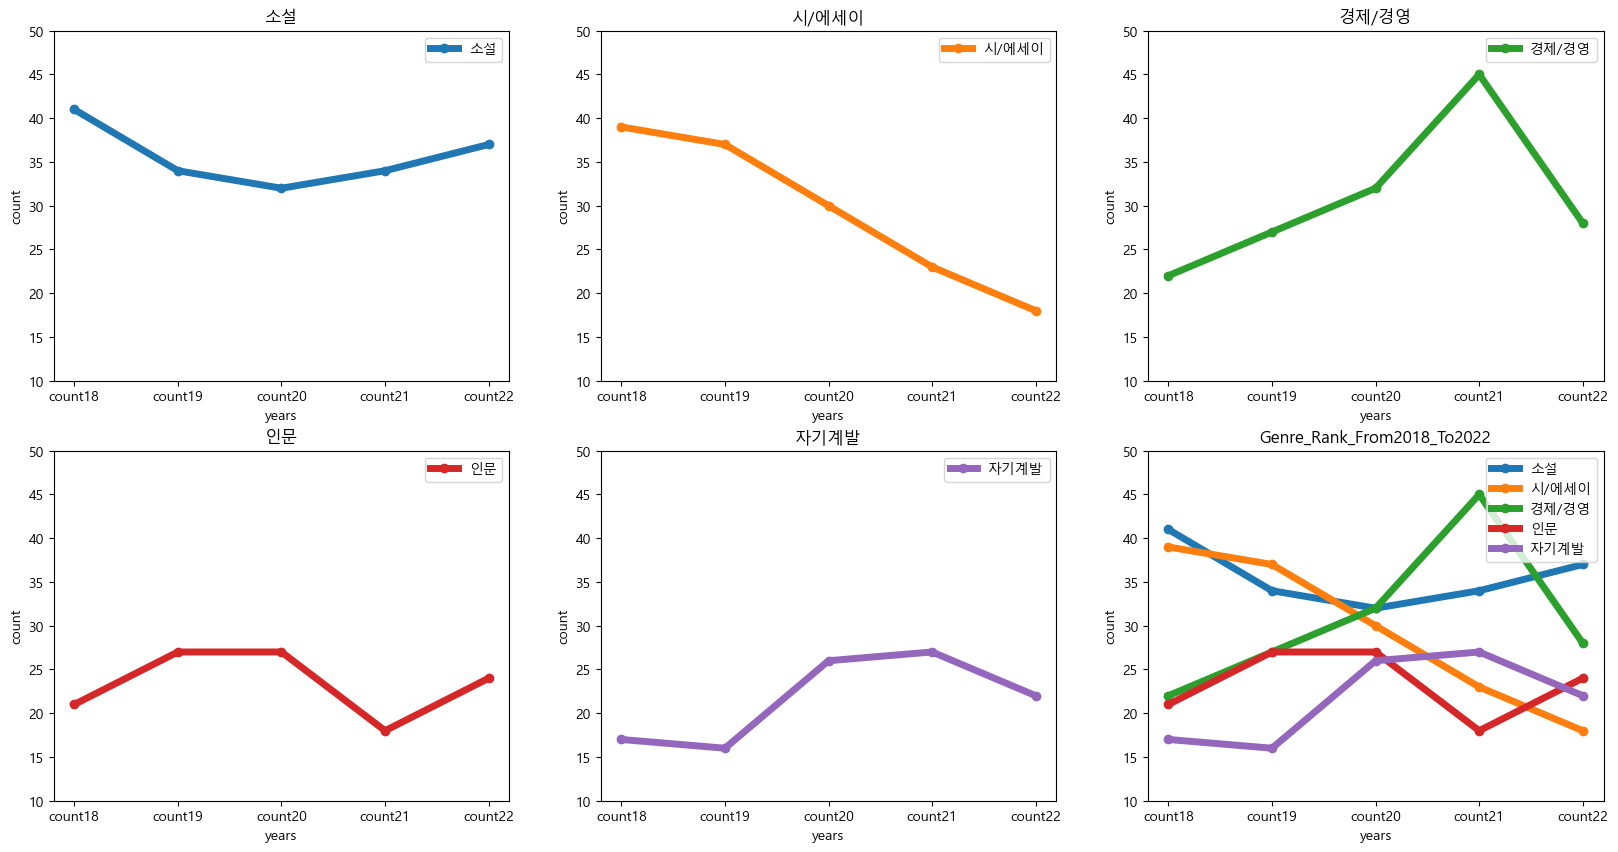

In [11]:
# '경제/경영','소설','시/에세이','인문','자기계발' 상위 5장르의 권 수 꺾은선 그래프

# 딕셔너리 형식으로 sql 분석쿼리 불러오기
cursor = db.cursor(pymysql.cursors.DictCursor) 
sql = """
WITH book18 AS(SELECT genre, count(*) c 
    FROM best_books_5years_2 WHERE years=2018 GROUP BY genre),
 book19 AS(SELECT genre, count(*) c 
    FROM best_books_5years_2 WHERE years=2019 GROUP BY genre),
book20 AS(SELECT genre, count(*) c 
    FROM best_books_5years_2 WHERE years=2020 GROUP BY genre),
book21 AS(SELECT genre, count(*) c 
    FROM best_books_5years_2 WHERE years=2021 GROUP BY genre),
book22 AS(SELECT genre, count(*) c 
    FROM best_books_5years_2 WHERE years=2022 GROUP BY genre)
SELECT g.genre, b18.c count18, b19.c count19, b20.c count20, b21.c count21, b22.c count22
FROM genre_idx g LEFT JOIN book22 b22 ON g.genre = b22.genre
                 LEFT JOIN book21 b21 ON g.genre = b21.genre
                 LEFT JOIN book20 b20 ON g.genre = b20.genre
                 LEFT JOIN book19 b19 ON g.genre = b19.genre
                 LEFT JOIN book18 b18 ON g.genre = b18.genre
WHERE not(b22.c is null and b21.c is null and b20.c is null
      and b19.c is null and b18.c is null)
ORDER BY 2 DESC LIMIT 5;"""
cursor.execute(query=sql)
result = cursor.fetchall()

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')

# 각 장르별 경향
x = list(result[0].keys()); y = []
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']
for i in range(len(result)):
    y.append(list(result[i].values()))
    plt.subplot(2,3,i+1)
    plt.plot(x[1:],y[-1][1:],marker='o',label=y[-1][0], linewidth='5',color=colors[i])
    plt.title(y[-1][0])
    plt.legend(); plt.ylim([10,50])
    plt.xlabel('years'); plt.ylabel('count')
    
# 종합
for i in range(len(result)):
    plt.subplot(2,3,6)
    plt.plot(x[1:],y[i][1:],marker='o',label=y[i][0], linewidth='5')
    plt.title('Genre_Rank_From2018_To2022')
    plt.xlabel('years'); plt.ylabel('count')

plt.legend()
plt.ylim([10,50])
plt.show()

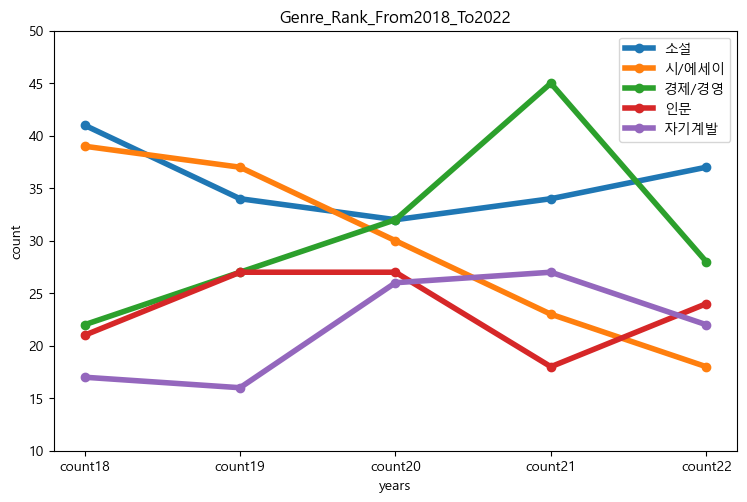

In [12]:
# 상위 5 장르 권 수 결과 확대
fig = plt.figure(figsize=(30,12))
fig.set_facecolor('white')
for i in range(len(result)):
    plt.subplot(2,3,6)
    plt.plot(x[1:],y[i][1:],marker='o',label=y[i][0], linewidth='4')

plt.title('Genre_Rank_From2018_To2022')
plt.xlabel('years'); plt.ylabel('count')
plt.legend()
plt.ylim([10,50])
plt.show()

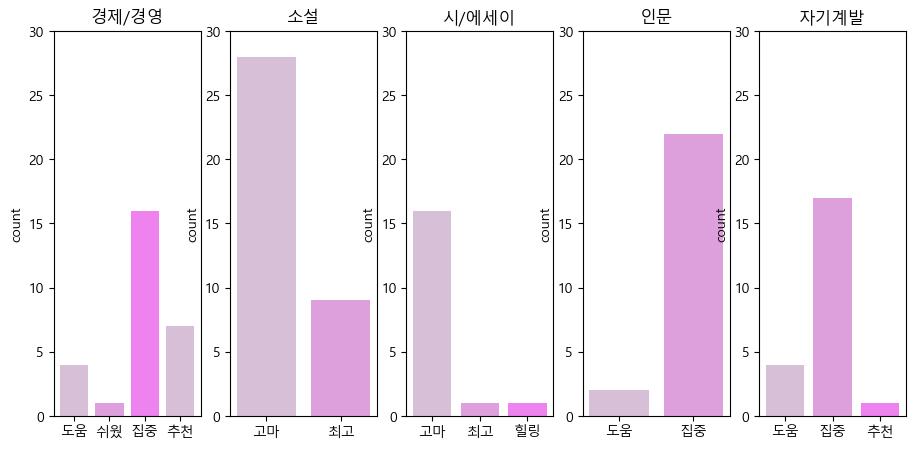

In [47]:
# 상위 5 장르 당 likes(코멘트) 경향성 막대그래프

sql = """SELECT genre, likes, count(likes) comment_n FROM best_books_5years_2
WHERE years = 2022 AND genre in ('소설','시/에세이','인문','자기계발','경제/경영')
GROUP BY genre, likes ORDER BY genre;"""

cursor.execute(query=sql)
result = cursor.fetchall() #result

genre_li = ['경제/경영','소설','시/에세이','인문','자기계발']
check = 0
data = [{},{},{},{},{}]
for i in range(len(result)):
    if result[i]['genre'] != genre_li[check]:
        check += 1
    data[check][result[i]['likes']] = result[i]['comment_n']

fig = plt.figure(figsize=(11,5))
for i in range(len(data)):
    plt.subplot(1,5,i+1)
    x = list(data[i].keys())
    values = list(data[i].values())
    plt.bar([x2[:2] for x2 in x], values, color=['thistle','plum','violet'])
    plt.title(genre_li[i])
    plt.ylim([0,30])
plt.show()

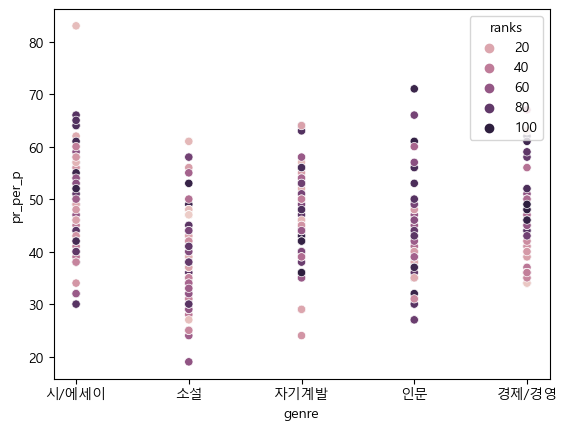

In [23]:
#sql문으로 테이블에 있는 정보 가져오기
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='mywork', charset='utf8')
cursor = db.cursor()
sql = """
WITH high_g AS(
    SELECT genre, count(*) g_c FROM best_books_5years_2
    GROUP BY genre ORDER BY g_c DESC LIMIT 5) ,
g_pr_p_r AS (
    SELECT title, publisher, genre, page, price, ranks,
    ifnull(round(price/page), 0) pr_per_p
    FROM best_books_5years
    GROUP BY genre, title, publisher, page, ranks, price, pr_per_p
    ORDER BY genre, pr_per_p DESC, page DESC, ranks)
SELECT b.genre, a.pr_per_p, a.ranks
FROM best_books_5years c NATURAL JOIN high_g b 
                         NATURAL JOIN g_pr_p_r a;"""
cursor.execute(sql)
test3= cursor.fetchall()

#판다스로 파이썬에서 테이블화 하기
pd.set_option('display.max_row', 700)
table3 = pd.DataFrame(test3, columns = ['genre', 'pr_per_p', 'ranks'])

#시각화 플랏 뽑기 _스캐터플랏
plot3 = sns.scatterplot(data=table3, x='genre', y = 'pr_per_p', hue='ranks')
plt.show()

In [48]:
db.commit()
db.close

<bound method Connection.close of <pymysql.connections.Connection object at 0x000002373CE73E50>>